**Hi! In this code I am implementing MNIST(handwritten digit recognition), using a Convolutional Neural Network in PyTorch:**




**1-** Importing necessary libraries:

In [64]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from torch import nn
from tensorflow.keras.datasets import mnist
import mplcyberpunk         # A library for modernizing matplotlib
                            # install using this command:
                            # pip install mplcyberpunk 

**2-** Loading the MNIST dataset, provided by **Keras**, **TensorFlow**:

In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape: ',x_train.shape,'  y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape,'  y_test shape: ',y_test.shape)

x_train shape:  (60000, 28, 28)   y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)   y_test shape:  (10000,)


**3-** Visualizing the dataset:

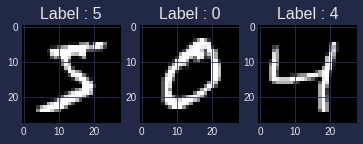

In [66]:
plt.style.use('cyberpunk')
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title("Label : {}".format(y_train[i]),fontsize=16)
plt.show()

**4-** Normalizing *x_train* and *x_test* from **0-255** values to **0-1**:

In [67]:
print('random row vector of x_train and x_test in raw format:')
first_index, second_index = np.random.choice(len(x_test)), np.random.randint(10,20)
print(x_test[first_index,second_index],'\nand\n',x_train[first_index,second_index])
print('\n\nrandom row vector of x_train and x_test after normalization:')
x_test, x_train = x_test/255, x_train/255
print(x_test[first_index,second_index],'\nand\n',x_train[first_index,second_index])

random row vector of x_train and x_test in raw format:
[  0   0   0   0   0   0   0   0   0  36  52  52 222 254 254  68   0   0
   0   0   0   0   0   0   0   0   0   0] 
and
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  71 211
 253 217  12   0   0   0   0   0   0   0]


random row vector of x_train and x_test after normalization:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.14117647 0.20392157 0.20392157
 0.87058824 0.99607843 0.99607843 0.26666667 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ] 
and
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.27843137 0.82745098
 0.99215686 0.85098039 0.04705882 0.         0.         0.
 0.         0.         0.         0.        ]


**5-** Investigating the process of **Convolution**:

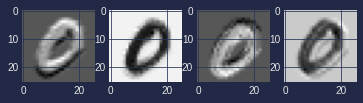

In [68]:
index = np.random.randint(0,10000)
layer = nn.Conv2d(in_channels=1,out_channels=4,kernel_size=(3,3))

temp = torch.Tensor(x_train[index]).unsqueeze(0)
out = layer(temp)

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(out[i].detach().numpy(),cmap='gray')
plt.show()

**6-** Building the CNN with **5 layers**:

In [69]:
class MNIST_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.ConvLayer = nn.Sequential(
            nn.Conv2d(in_channels=1,          # shape of input(color channels) => B & W
                     out_channels=16,         # Hidden units
                     stride=2,
                     kernel_size=(3,3)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2),
            nn.Conv2d(in_channels=16,
                     out_channels=32,
                     stride=1,
                     kernel_size=(3,3)),
        )
        self.NeuralNet = nn.Sequential(
            nn.Linear(512,64),
            nn.ReLU(),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(64,10),
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.ConvLayer(x)
        x = x.view(x.size(0),-1)
        return self.NeuralNet(x)

**7-** Investigating the **Non-Trained** model on test data:

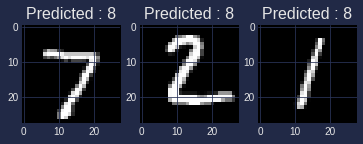

In [70]:
model = MNIST_Classifier()
y_pred = []

for i in range(3):
    temp = model(torch.Tensor(x_test).squeeze().unsqueeze(1))
    plt.subplot(1,3,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title("Predicted : {}".format(torch.argmax(temp[0])),fontsize=16)
plt.show()

**8-** Importing **Optimizer**  and  **Loss Function**:


In [71]:
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
criterion = CrossEntropyLoss()
optimizer = Adam(params=model.parameters(), lr=0.01)

**9-** Creating **Tensors with prefered datatype**, making labels **one-hot** and enabling **gradient tracking**:

In [72]:
print('Does x_train track gradients: ',torch.Tensor(x_train).requires_grad)
x_train = torch.from_numpy(x_train).type(torch.float).requires_grad_()
x_test = torch.from_numpy(x_test).type(torch.float).requires_grad_()
print('\nDoes x_train track gradients: ',torch.Tensor(x_train).requires_grad)

y_test = torch.nn.functional.one_hot(torch.Tensor(y_test).type(torch.LongTensor), num_classes=10)
y_train = torch.nn.functional.one_hot(torch.Tensor(y_train).type(torch.LongTensor), num_classes=10)
y_train = y_train.type(torch.float).requires_grad_()
y_test = y_test.type(torch.float).requires_grad_()

Does x_train track gradients:  False

Does x_train track gradients:  True


**10-** Creating a **Cross Validation set** out of the training set (10% of it):

In [73]:
x_CV = x_train[54000:]
y_CV = y_train[54000:]
print("shape of cross validation set:",x_CV.shape, y_CV.shape)
x_train = x_train[:54000]
y_train = y_train[:54000]
print("shape of new training set:",x_train.shape, y_train.shape)

shape of cross validation set: torch.Size([6000, 28, 28]) torch.Size([6000, 10])
shape of new training set: torch.Size([54000, 28, 28]) torch.Size([54000, 10])


**11-** Building a training loop and keeping the record of **loss** and **accuracy** for train and CV:

In [74]:
tic, toc = time.time(), time.time()
epochs, train_accuracy_list, train_loss_list = [], [], []
CV_loss_list, CV_accuracy_list = [], []

for epoch in range(131):
    
    model.train()
    y_pred = model(x_train.unsqueeze(1)).type(torch.float)
    loss = criterion(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        
        CV_y_pred = model(x_CV.unsqueeze(1)).type(torch.float)  
        CV_loss = criterion(CV_y_pred,y_CV)
        CV_loss_list.append(CV_loss.detach().numpy())  #loss for CV
        
        CV_correct = torch.eq(CV_y_pred.argmax(dim=-1),y_CV.argmax(dim=-1)).sum().item()
        CV_acc = (CV_correct / len(y_CV)) * 100
        CV_accuracy_list.append(CV_acc)                #accuracy for CV

        train_correct = torch.eq(y_pred.argmax(dim=-1),y_train.argmax(dim=-1)).sum().item()
        train_acc = (train_correct / len(y_train)) * 100
        train_accuracy_list.append(train_acc)          #accuracy for train
        
        train_loss_list.append(loss.detach().numpy())  #loss for train
                  
        epochs.append(epoch)
        
        toc = time.time()

        print(f'epoch #{epoch} | loss: {loss:.3f} | train accuracy: % {train_acc:.4f}',
              f'| CV accuracy: % {CV_acc:.4f} | spent time: {toc-tic:.2f} sec')
        
        tic = time.time()

epoch #0 | loss: 2.307 | train accuracy: % 9.6056 | CV accuracy: % 20.3000 | spent time: 5.34 sec
epoch #10 | loss: 0.869 | train accuracy: % 71.7481 | CV accuracy: % 78.5167 | spent time: 52.96 sec
epoch #20 | loss: 0.415 | train accuracy: % 87.0556 | CV accuracy: % 90.2167 | spent time: 53.47 sec
epoch #30 | loss: 0.244 | train accuracy: % 92.5241 | CV accuracy: % 94.4000 | spent time: 53.87 sec
epoch #40 | loss: 0.163 | train accuracy: % 95.0074 | CV accuracy: % 96.3333 | spent time: 54.09 sec
epoch #50 | loss: 0.120 | train accuracy: % 96.3685 | CV accuracy: % 96.9833 | spent time: 53.81 sec
epoch #60 | loss: 0.097 | train accuracy: % 97.1426 | CV accuracy: % 97.2833 | spent time: 53.66 sec
epoch #70 | loss: 0.078 | train accuracy: % 97.6278 | CV accuracy: % 97.9667 | spent time: 53.51 sec
epoch #80 | loss: 0.068 | train accuracy: % 97.9500 | CV accuracy: % 97.7667 | spent time: 54.99 sec
epoch #90 | loss: 0.058 | train accuracy: % 98.2259 | CV accuracy: % 98.1000 | spent time: 53.

**12-** Taking out **the highest probablities** from predicted labels:

In [75]:
y_pred = model(x_test.unsqueeze(1)).type(torch.float)
print('the first prediction of x_test in raw format: \n', y_pred[0])
y_pred = y_pred.argmax(dim=-1)
print('the first prediction of x_test after argmax: \n', y_pred[0])

the first prediction of x_test in raw format: 
 tensor([ -7.3712,  -0.6916,   2.6209,  -0.9379, -10.2339,  -7.6200, -18.4498,
         16.4994,  -7.2743,   2.1495], grad_fn=<SelectBackward0>)
the first prediction of x_test after argmax: 
 tensor(7)


**13-** Checking a random example from **x_test**:

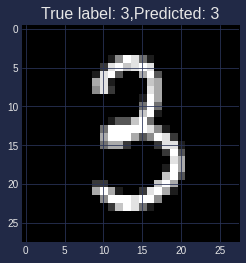

In [76]:
index = np.random.choice(len(x_test))
plt.imshow(x_test[index].detach().numpy().reshape(28,28),cmap='gray')
plt.title(f'True label: {y_test[index].argmax()},Predicted: {y_pred[index]:.0f}',fontsize=16)
plt.show()

**14-**  Checking  **the accuracy** for the test set:

In [77]:
y_pred = y_pred.type(torch.float)
correct = torch.eq(y_pred, y_test.argmax(dim=-1).type(torch.float)).sum().item()
acc = (correct / len(y_test)) * 100
print(f'accuracy for the test set : % {acc}')

accuracy for the test set : % 98.31


**15-** Plotting the curves:

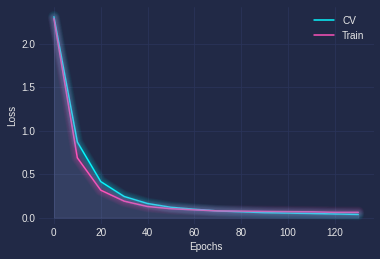

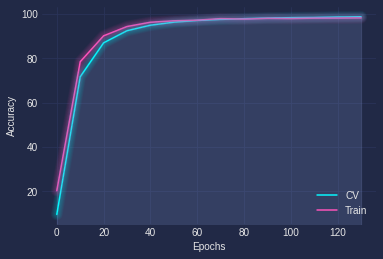

In [78]:
plt.plot(epochs,train_loss_list)
plt.plot(epochs,CV_loss_list)
mplcyberpunk.make_lines_glow()
mplcyberpunk.add_underglow()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['CV','Train'])
plt.show()
plt.plot(epochs,train_accuracy_list)
plt.plot(epochs,CV_accuracy_list)
mplcyberpunk.make_lines_glow()
mplcyberpunk.add_underglow()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['CV','Train'])
plt.show()